# 0. Introducción

<img src="https://raw.githubusercontent.com/JoePortilla/AvocadoPrice-EDA/main/img/Avocado_eda_cover.jpg" width="800" alt="logo" style="display:block;margin:auto;">

- El dataset de precios de aguacate contiene información sobre el precio promedio de los aguacates en diferentes regiones de los Estados Unidos, recopilados desde el año 2015 hasta el año 2020.
- Incluye información detallada sobre la cantidad de aguacates vendidos en diferentes tamaños y tipos (convencionales y orgánicos), así como información sobre la cantidad de bolsas vendidas.
- Este dataset puede ser utilizado para analizar las tendencias en los precios y la demanda de diferentes tipos y tamaños de aguacates en diferentes regiones geográficas de los Estados Unidos.

## Objetivo general
Construir un modelo para predecir la venta futura de aguacates.

## Objetivo especifico
Este notebook se centra en explorar y visualizar el conjunto de datos.
- Realizar un análisis exploratorio de datos para comprender los datos y elegir las mejores características. 
- Encontrar los factores que influyen en la venta de aguacates, y la relación entre la región, el mes o el tipo de aguacate.

## Paquetes utilizados:
- Procesamiento de datos
    - Pandas.
- Procesamiento numérico.
    - NumPy
- Visualización de datos
    - Seaborn
    - Matplotlib.

## Referencias:
- [Hass Avocado Board](https://hassavocadoboard.com/)

## Instructor:
Joseph Santiago Portilla - Ingeniero Electrónico.
- GitHub: https://github.com/JoePortilla
- Twitter: https://twitter.com/JoePortilla
- LinkedIn: https://www.linkedin.com/in/PortillaJoe
- Kaggle: https://www.kaggle.com/joeportilla


# 1. Ajustes Iniciales

## 1.1 Importación de Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Definición de estilo de gráficas

In [2]:
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use("seaborn-whitegrid")

# 2. Carga de Dataset y Revisión inicial

## 2.1. Lectura de CSV

In [3]:
df = pd.read_csv('/kaggle/input/avocado-prices-2020/avocado-updated-2020.csv')

## 2.2. Exploración inicial del dataframe

### Info. general del dataset

El conjunto de datos contiene las siguientes variables:

- `date`: Fecha de la medición del precio promedio de los aguacates.
- `average_price`: Precio promedio de los aguacates en la región especificada en la fecha indicada.
- `total_volume`: Cantidad total de aguacates vendidos
- `4046`: Cantidad de aguacates vendidos con el código PLU 4046
- `4225`: Cantidad de aguacates vendidos con el código PLU 4225
- `4770`: Cantidad de aguacates vendidos con el código PLU 4770
- `total_bags`: Cantidad total de bolsas de aguacates vendidas
- `small_bags`: Cantidad de bolsas pequeñas de aguacates vendidas
- `large_bags`: Cantidad de bolsas grandes de aguacates vendidas
- `xlarge_bags`: Cantidad de bolsas extra grandes de aguacates vendidas
- `type`: Tipo de aguacate vendido, puede ser convencional o orgánico.
- `year`: Año en el que se realizó la medición
- `geography`: Región geográfica en la que se realizó la medición

### Variables categoricas
- Tipo de aguacate
- Ubicación de venta

### Variables numéricas
- Todas las demás

In [4]:
df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33045 non-null  object 
 1   average_price  33045 non-null  float64
 2   total_volume   33045 non-null  float64
 3   4046           33045 non-null  float64
 4   4225           33045 non-null  float64
 5   4770           33045 non-null  float64
 6   total_bags     33045 non-null  float64
 7   small_bags     33045 non-null  float64
 8   large_bags     33045 non-null  float64
 9   xlarge_bags    33045 non-null  float64
 10  type           33045 non-null  object 
 11  year           33045 non-null  int64  
 12  geography      33045 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.3+ MB


### Dimensión del datafrane

In [6]:
df.shape

(33045, 13)

### Comprobación de valores faltantes

El dataset esta completo y no cuenta con valores faltantes

In [7]:
df.isnull().sum(axis=0)

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64

## 3. Preprocesamiento

## 3.1. Conversión de `date`. De cadena de caracteres a formato de fecha y hora

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.dtypes

date             datetime64[ns]
average_price           float64
total_volume            float64
4046                    float64
4225                    float64
4770                    float64
total_bags              float64
small_bags              float64
large_bags              float64
xlarge_bags             float64
type                     object
year                      int64
geography                object
dtype: object

## 3.2. Eliminación de datos correspondientes a regiones de EE.UU. sumadas

- Como se observa a continuación, en `geography` (Ubicación en la que se realizó la medición) existen 5 regiones `West`, `Midsouth`, `Northeast`, `Southeast`, y`South Central` que representan una suma de los datos de una región geográfica grande, en lugar de una región específica.
- Con respecto a `Total U.S.`, de acuerdo con esta [página](https://hassavocadoboard.com/report/total-us/), los datos están agregados para las siguientes 8 áreas geográficas de los Estados Unidos: California, Great Lakes, Midsouth, Northeast, Plains, Southeast, South Central y West. Sin embargo, el promedio de los datos para estas regiones y áreas no resulta en entradas iguales a las de los datos de Total U.S., lo que podría resultar en posibles errores de análisis.
- Si se desea analizar datos específicos de cada región geográfica individual, entonces se deberían eliminar estas filas.

In [10]:
print(df['geography'].unique())

['Albany' 'Atlanta' 'Baltimore/Washington' 'Boise' 'Boston'
 'Buffalo/Rochester' 'California' 'Charlotte' 'Chicago'
 'Cincinnati/Dayton' 'Columbus' 'Dallas/Ft. Worth' 'Denver' 'Detroit'
 'Grand Rapids' 'Great Lakes' 'Harrisburg/Scranton' 'Hartford/Springfield'
 'Houston' 'Indianapolis' 'Jacksonville' 'Las Vegas' 'Los Angeles'
 'Louisville' 'Miami/Ft. Lauderdale' 'Midsouth' 'Nashville'
 'New Orleans/Mobile' 'New York' 'Northeast' 'Northern New England'
 'Orlando' 'Philadelphia' 'Phoenix/Tucson' 'Pittsburgh' 'Plains'
 'Portland' 'Raleigh/Greensboro' 'Richmond/Norfolk' 'Roanoke' 'Sacramento'
 'San Diego' 'San Francisco' 'Seattle' 'South Carolina' 'South Central'
 'Southeast' 'Spokane' 'St. Louis' 'Syracuse' 'Tampa' 'Total U.S.' 'West'
 'West Tex/New Mexico']


En este análisis se eliminaran estas regiones geograficas grandes, ya que generarían conclusiones erroneas

In [11]:
filt = df['geography'].isin(['Total U.S.', 'West', 'Midsouth', 'Northeast', 'Southeast', 'South Central'])
df = df[~filt]

Entonces las regiones quedarán de la siguiente manera

In [12]:
print(df['geography'].unique())

['Albany' 'Atlanta' 'Baltimore/Washington' 'Boise' 'Boston'
 'Buffalo/Rochester' 'California' 'Charlotte' 'Chicago'
 'Cincinnati/Dayton' 'Columbus' 'Dallas/Ft. Worth' 'Denver' 'Detroit'
 'Grand Rapids' 'Great Lakes' 'Harrisburg/Scranton' 'Hartford/Springfield'
 'Houston' 'Indianapolis' 'Jacksonville' 'Las Vegas' 'Los Angeles'
 'Louisville' 'Miami/Ft. Lauderdale' 'Nashville' 'New Orleans/Mobile'
 'New York' 'Northern New England' 'Orlando' 'Philadelphia'
 'Phoenix/Tucson' 'Pittsburgh' 'Plains' 'Portland' 'Raleigh/Greensboro'
 'Richmond/Norfolk' 'Roanoke' 'Sacramento' 'San Diego' 'San Francisco'
 'Seattle' 'South Carolina' 'Spokane' 'St. Louis' 'Syracuse' 'Tampa'
 'West Tex/New Mexico']


## 3.3. Dataframe preprocesado

In [13]:
df.head(3)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29373 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           29373 non-null  datetime64[ns]
 1   average_price  29373 non-null  float64       
 2   total_volume   29373 non-null  float64       
 3   4046           29373 non-null  float64       
 4   4225           29373 non-null  float64       
 5   4770           29373 non-null  float64       
 6   total_bags     29373 non-null  float64       
 7   small_bags     29373 non-null  float64       
 8   large_bags     29373 non-null  float64       
 9   xlarge_bags    29373 non-null  float64       
 10  type           29373 non-null  object        
 11  year           29373 non-null  int64         
 12  geography      29373 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 3.1+ MB


# 4. Análisis Univariado

**Observaciones**
- k

In [15]:
df.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
average_price,29373.000000,1.385951,0.384179,0.440000,1.100000,1.350000,1.620000,3.250000
total_volume,29373.000000,396991.059357,875284.940053,84.560000,12880.300000,94209.000000,406520.660000,11324682.730000
4046,29373.000000,117678.750611,305091.716146,0.000000,548.940000,7086.890000,94536.730000,4794142.140000
4225,29373.000000,118678.243686,283278.693988,0.000000,2146.330000,17099.100000,95085.100000,4097591.670000
4770,29373.000000,11244.410539,42664.431891,0.000000,0.000000,100.000000,3385.240000,794742.870000
total_bags,29373.000000,149335.890207,356422.175179,0.000000,7719.800000,40810.600000,131142.570000,6301211.120000
small_bags,29373.000000,105967.502650,260109.474866,0.000000,5005.470000,26544.500000,93651.310000,4017034.510000
large_bags,29373.000000,39157.856249,110137.208738,0.000000,277.510000,4304.080000,27688.540000,2389749.500000
xlarge_bags,29373.000000,4210.531002,24966.658241,0.000000,0.000000,0.000000,513.330000,730833.290000
year,29373.000000,2017.460899,1.699752,2015.000000,2016.000000,2017.000000,2019.000000,2020.000000


## 4.1. Precio

## 4.2. Volumen

### 4.2.1. Por tipo

In [16]:
df.groupby('type').mean()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
type,,,,,,,,,,
conventional,1.150897,766707.582121,232406.977786,230866.550304,22405.553999,281021.940434,199138.806497,73469.230187,8413.903069,2017.460784
organic,1.621053,27199.007169,2927.085596,6467.018108,80.986968,17622.937825,12777.164829,4839.472838,6.300227,2017.461015


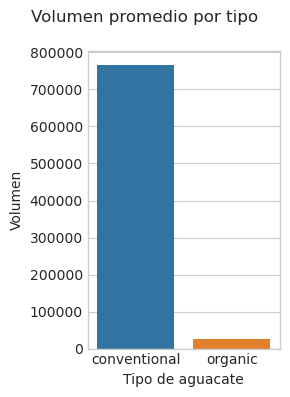

In [17]:
fig, ax = plt.subplots(figsize=(3, 4))
fig.suptitle('Volumen promedio por tipo')

sns.barplot(data=df, x='type', y='total_volume', ax=ax, estimator='mean', errorbar=None)
ax.set_xlabel('Tipo de aguacate')
ax.set_ylabel('Volumen')

plt.tight_layout()

### 4.2.2. Tendencias de volumen por año

In [18]:
df.groupby('year').mean()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags
year,,,,,,,,,
2015,1.382603,326466.122184,124476.531813,133462.363887,12867.007804,55660.218680,46859.250567,8195.660242,605.307870
2016,1.345453,356919.401719,104696.221182,129227.699665,13488.590913,109506.889958,85762.792804,21950.219573,1793.877580
2017,1.522934,356310.853287,112340.189855,116762.158889,8909.697513,118295.819917,91059.414129,25036.090855,2200.313164
2018,1.359938,422946.098070,124876.341567,129743.538512,10867.766981,157147.813000,120620.185247,33357.937753,3169.690000
2019,1.405994,420272.628974,108831.967594,109811.523860,11180.505869,190447.165491,126202.336496,57878.460228,6366.367764
2020,1.287101,509971.334266,132509.187656,91661.381189,10086.372882,275693.674996,171452.577828,92561.871634,11679.226619


#### Tendencia del volumen promedio por año

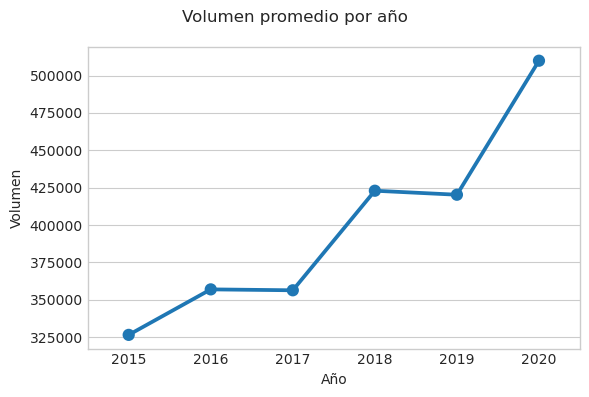

In [19]:
fig, ax = plt.subplots(figsize=(6, 4))
fig.suptitle('Volumen promedio por año')

sns.pointplot(data=df, x='year', y='total_volume', ax=ax, estimator='mean', errorbar=None)
ax.set_xlabel('Año')
ax.set_ylabel('Volumen')


plt.tight_layout()

#### Tendencia del volumen promedio por código de tamaño

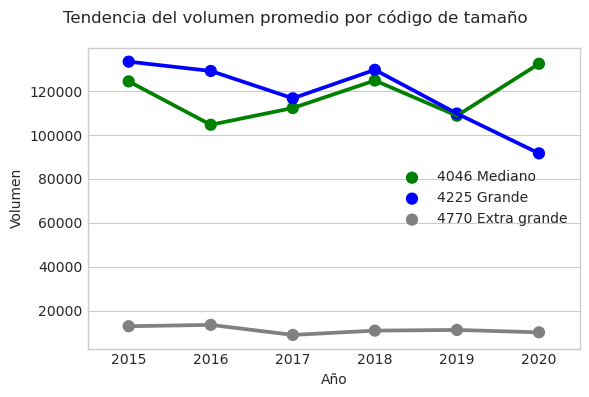

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))
fig.suptitle('Tendencia del volumen promedio por código de tamaño')

sns.pointplot(data=df, x='year', y='4046', ax=ax, estimator='mean', errorbar=None, color='green', label='4046 Mediano')
sns.pointplot(data=df, x='year', y='4225', ax=ax, estimator='mean', errorbar=None, color='blue', label='4225 Grande')
sns.pointplot(data=df, x='year', y='4770', ax=ax, estimator='mean', errorbar=None, color='gray', label='4770 Extra grande')
ax.set_xlabel('Año')
ax.set_ylabel('Volumen')
ax.legend()

plt.tight_layout()


#### Tendencia del volumen promedio por tipo de bolsa

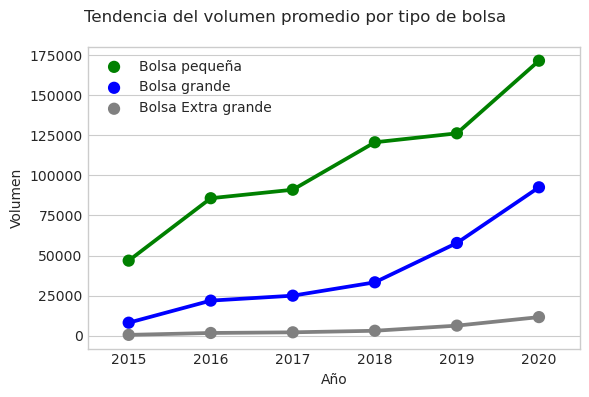

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))
fig.suptitle('Tendencia del volumen promedio por tipo de bolsa')

sns.pointplot(data=df, x='year', y='small_bags', ax=ax, estimator='mean', errorbar=None, color='green', label='Bolsa pequeña')
sns.pointplot(data=df, x='year', y='large_bags', ax=ax, estimator='mean', errorbar=None, color='blue', label='Bolsa grande')
sns.pointplot(data=df, x='year', y='xlarge_bags', ax=ax, estimator='mean', errorbar=None, color='gray', label='Bolsa Extra grande')
ax.set_xlabel('Año')
ax.set_ylabel('Volumen')
ax.legend()

plt.tight_layout()


#### Tendencia del volumen promedio por tipo de aguacate

In [22]:
df.groupby(['type', 'year']).mean()

average_price   total_volume           4046           4225  \
type         year                                                               
conventional 2015       1.083890  639386.462696  245142.825713  260364.594107   
             2016       1.110517  693652.535008  206955.042412  250170.173429   
             2017       1.301836  687591.359379  222021.851478  225900.855385   
             2018       1.147929  813587.695327  246607.649877  251839.916182   
             2019       1.193702  809403.764587  214643.497003  214627.280072   
             2020       1.057227  977028.278581  262396.900907  179663.264358   
organic      2015       1.681435   13420.362697    3761.874669    6509.271050   
             2016       1.580389   20186.268429    2437.399952    8285.225901   
             2017       1.744205   24769.701637    2572.232667    7537.594024   
             2018       1.571947   32304.500812    3145.033257    7647.160842   
             2019       1.618285   31141.493361    3020.438185    4995.767648   
             2020       1.516975   42914.389952    2621.474405    3659.498021   

                           4770     total_bags     small_bags     large_bags  \
type         year                                                              
conventional 2015  25631.169395  108247.873482   91732.780513   15304.719740   
             2016  26812.524716  209714.794451  165503.829347   40623.209944   
             2017  17757.052571  221911.600731  171433.121761   46080.217693   
             2018  21707.526046  293432.603223  224153.513359   62941.653112   
             2019  22299.319912  357832.743413  233153.507364  111948.359808   
             2020  20097.296502  514829.999714  320139.814262  171367.184240   
organic      2015     97.730317    3051.486661    1967.735238    1083.751423   
             2016    164.657111    9298.985465    6021.756262    3277.229203   
             2017     55.381515   14598.516066   10622.469906    3975.406876   
             2018     28.007917   20863.022776   17086.857134    3774.222394   
             2019     61.691827   23061.587568   19251.165629    3808.560649   
             2020     75.449262   36557.350278   22765.341393   13756.559028   

                    xlarge_bags  
type         year                
conventional 2015   1210.373229  
             2016   3587.755160  
             2017   4398.257740  
             2018   6337.436752  
             2019  12730.873438  
             2020  23323.003815  
organic      2015      0.000000  
             2016      0.000000  
             2017      0.639284  
             2018      1.943248  
             2019      1.862091  
             2020     35.449423

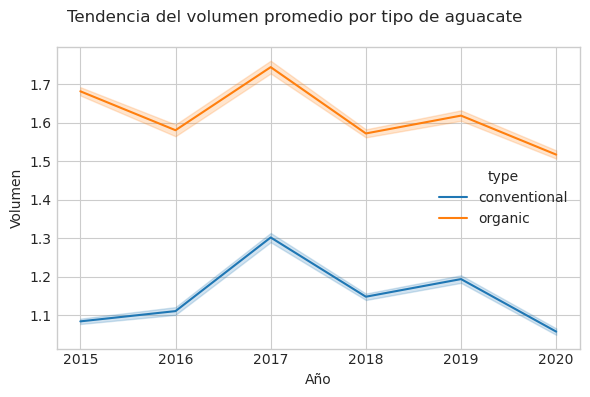

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))
fig.suptitle('Tendencia del volumen promedio por tipo de aguacate')

sns.lineplot(data=df, x='year', y='average_price', ax=ax, hue='type')
ax.set_xlabel('Año')
ax.set_ylabel('Volumen')

plt.tight_layout()

## 4.3. región

# 5. Análisis Multivariado

## 5.5. Correlación

In [24]:
corr = df.corr()
corr

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
average_price,1.000000,-0.316184,-0.334868,-0.231258,-0.180824,-0.284260,-0.270727,-0.257509,-0.101595,-0.054910
total_volume,-0.316184,1.000000,0.905531,0.856121,0.727402,0.913145,0.928615,0.620052,0.626145,0.064542
4046,-0.334868,0.905531,1.000000,0.680491,0.556181,0.760412,0.792614,0.474906,0.502926,0.009684
4225,-0.231258,0.856121,0.680491,1.000000,0.669106,0.645094,0.704732,0.343066,0.353837,-0.043145
4770,-0.180824,0.727402,0.556181,0.669106,1.000000,0.658779,0.667345,0.435156,0.532467,-0.021511
total_bags,-0.284260,0.913145,0.760412,0.645094,0.658779,1.000000,0.962001,0.791435,0.762225,0.187018
small_bags,-0.270727,0.928615,0.792614,0.704732,0.667345,0.962001,1.000000,0.598780,0.673737,0.143778
large_bags,-0.257509,0.620052,0.474906,0.343066,0.435156,0.791435,0.598780,1.000000,0.648844,0.235122
xlarge_bags,-0.101595,0.626145,0.502926,0.353837,0.532467,0.762225,0.673737,0.648844,1.000000,0.134722
year,-0.054910,0.064542,0.009684,-0.043145,-0.021511,0.187018,0.143778,0.235122,0.134722,1.000000


<AxesSubplot:>

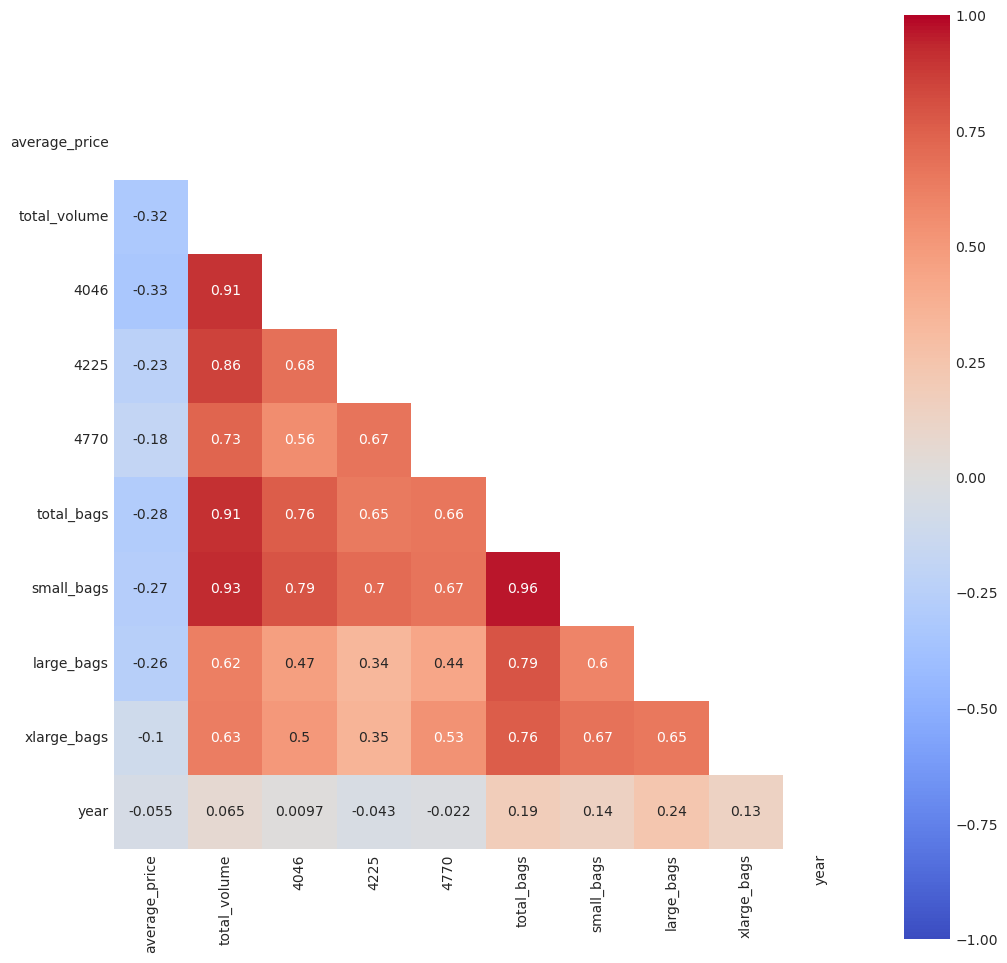

In [25]:
# Generación de una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='coolwarm', mask=mask, square=True, annot=True, center=0, vmin=-1, vmax=1)

# 6. Conclusiones EDA

- El dataset no tiene valores faltantes.
-  